In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('fbplayer_project/cleansed_players.csv')
df.head(10)

,player_name,position,team,college
0,"Abanikanda, Israel",RB,NY Jets,Pittsburgh
1,"Abdullah, Ameer",RB,Las Vegas,Nebraska
2,"Abdullah, Yasir",LB,Jacksonville,Louisville
3,"Abernathy, Micah",DB,Atlanta,Tennessee
4,"Abram, Johnathan",DB,New Orleans,Mississippi State
5,"Achane, De'Von",RB,Miami,Texas A&M
6,"Adams, Andrew",DB,Baltimore,Connecticut
7,"Adams, Davante",WR,Las Vegas,Fresno State
8,"Adams, Jamal",DB,Seattle,Louisiana State
9,"Adams, Matthew",LB,Cleveland,Houston


In [25]:
df.describe()

,player_name,position,team,college
count,2558,2558,2558,2558
unique,2545,16,32,286
top,"Allen, Josh",DB,Houston,Alabama
freq,2,486,90,72


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_name  2558 non-null   object
 1   position     2558 non-null   object
 2   team         2558 non-null   object
 3   college      2558 non-null   object
dtypes: object(4)
memory usage: 80.1+ KB


In [27]:
df[['Last', 'First']] = df['player_name'].str.split(",", expand=True)
df.drop(columns=['player_name'], inplace=True)

In [28]:
df.head()

,position,team,college,Last,First
0,RB,NY Jets,Pittsburgh,Abanikanda,Israel
1,RB,Las Vegas,Nebraska,Abdullah,Ameer
2,LB,Jacksonville,Louisville,Abdullah,Yasir
3,DB,Atlanta,Tennessee,Abernathy,Micah
4,DB,New Orleans,Mississippi State,Abram,Johnathan


In [32]:
df.rename(columns={
    "position": "Position", 
    "team": "Team", 
    "college": "College"})

,Position,Team,College,Last,First
0,RB,NY Jets,Pittsburgh,Abanikanda,Israel
1,RB,Las Vegas,Nebraska,Abdullah,Ameer
2,LB,Jacksonville,Louisville,Abdullah,Yasir
3,DB,Atlanta,Tennessee,Abernathy,Micah
4,DB,New Orleans,Mississippi State,Abram,Johnathan
...,...,...,...,...,...
2553,OG,Baltimore,Wisconsin,Zeitler,Kevin
2554,P,Tennessee,Kansas State,Zentner,Ty
2555,OT,Houston,Auburn,Zierer,Kilian
2556,K,NY Jets,Missouri Western State,Zuerlein,Greg


In [35]:
desired_order = ['First', 'Last'] + [col for col in df.columns if col not in ['First', 'Last']]
df = df[desired_order]

In [36]:
df.head()

,First,Last,position,team,college
0,Israel,Abanikanda,RB,NY Jets,Pittsburgh
1,Ameer,Abdullah,RB,Las Vegas,Nebraska
2,Yasir,Abdullah,LB,Jacksonville,Louisville
3,Micah,Abernathy,DB,Atlanta,Tennessee
4,Johnathan,Abram,DB,New Orleans,Mississippi State


In [60]:
result_df = df['college'].value_counts().reset_index(name='Count').head(10)
result_df.columns = ['Value', 'Count']
result_df.set_index('Value', inplace=True)
result_df

,Count
Value,
Alabama,72
Ohio State,63
Louisiana State,61
Georgia,55
Florida,47
Michigan,47
Notre Dame,45
Penn State,44
Iowa,41


In [45]:
df_by_college = df.groupby('college').count().sort_values(by='First', ascending=False)
df_by_college.head(10)

,First,Last,position,team
college,,,,
Alabama,72,72,72,72
Ohio State,63,63,63,63
Louisiana State,61,61,61,61
Georgia,55,55,55,55
Michigan,47,47,47,47
Florida,47,47,47,47
Notre Dame,45,45,45,45
Penn State,44,44,44,44
Clemson,41,41,41,41


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x600 with 0 Axes>

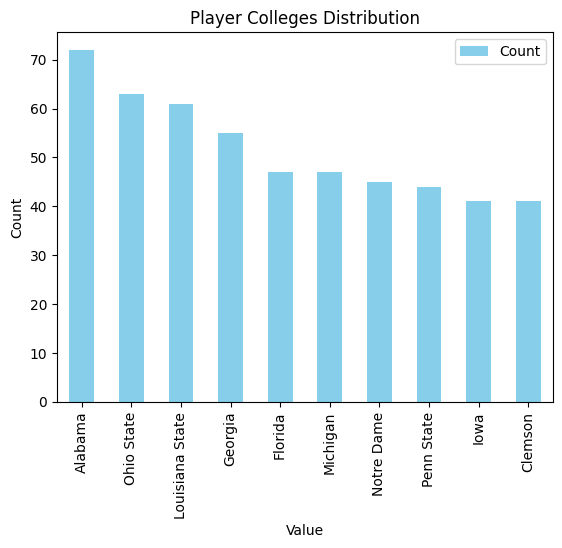

In [61]:
plt.figure(figsize=(10, 6))
result_df.plot(kind='bar', color='skyblue')
plt.title('Player Colleges Distribution')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show